<a href="https://colab.research.google.com/github/ac1793/SP23STAT21/blob/main/Red_Ventures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving _28For_Candidate_29_dspm_case_data_set_-__28For_Candidate_29_dspm_case_data_set.csv to _28For_Candidate_29_dspm_case_data_set_-__28For_Candidate_29_dspm_case_data_set.csv


In [3]:
import pandas as pd
df = pd.read_csv("_28For_Candidate_29_dspm_case_data_set_-__28For_Candidate_29_dspm_case_data_set.csv")

In [15]:
df.head()

,userId,sessionReferrer,browser,deviceType,estimatedAnnualIncome,estimatedPropertyType,visitCount,pageURL,ctaCopy,ctaPlacement,...,scheduledAppointment,revenue,mortgageVariation,cta_group,cta_group_encoded,engagement_score,revenue_bin,income_visit_interaction,cta_combination,cta_combination_encoded
0,user_97048,Google,Safari,Mobile,152000,Apartment,1,https://www.financialservices.com/mortgages/ty...,First Time? We've Made it Easy to Find the Bes...,Middle,...,0,0,NaN,Other,0,1,NaN,152000,First Time? We've Made it Easy to Find the Bes...,4
1,user_14393,Social,Safari,Mobile,140000,Apartment,2,https://www.financialservices.com/mortgages/ho...,Access Your Personalized Mortgage Rates Now,Bottom,...,0,0,NaN,Personalized Rates,1,1,NaN,280000,Access Your Personalized Mortgage Rates Now - ...,0
2,user_30959,Direct,Safari,Mobile,128000,House,1,https://www.financialservices.com/mortgages/fi...,Access Your Personalized Mortgage Rates Now,Bottom,...,0,0,NaN,Personalized Rates,1,1,NaN,128000,Access Your Personalized Mortgage Rates Now - ...,0
3,user_88588,Google,Chrome,Mobile,205000,Apartment,1,https://www.financialservices.com/mortgages/re...,Get Pre-Approved for a Mortgage in 5 Minutes,Middle,...,0,0,NaN,Pre-Approval,2,2,NaN,205000,Get Pre-Approved for a Mortgage in 5 Minutes -...,7
4,user_65965,Google,Safari,Mobile,373000,House,1,https://www.financialservices.com/mortgages/re...,Access Your Personalized Mortgage Rates Now,Top,...,0,0,NaN,Personalized Rates,1,0,NaN,373000,Access Your Personalized Mortgage Rates Now - Top,2


Part 1:

In [6]:
import matplotlib.pyplot as plt

CTA_counts = df.groupby(['ctaCopy', 'ctaPlacement']).size()
CTA_counts

ctaCopy                                                        ctaPlacement
Access Your Personalized Mortgage Rates Now                    Bottom          11111
                                                               Middle          11111
                                                               Top             11111
First Time? We've Made it Easy to Find the Best Mortgage Rate  Bottom          11111
                                                               Middle          11111
                                                               Top             11111
Get Pre-Approved for a Mortgage in 5 Minutes                   Bottom          11111
                                                               Middle          11111
                                                               Top             11112
dtype: int64

In [8]:
df.describe()

,estimatedAnnualIncome,visitCount,scrolledPage,scrollDepth,clickedCTA,scheduledAppointment,revenue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,130654.720000,2.225850,0.896760,62.258500,0.172610,0.055170,12.030350
std,62345.748304,2.070924,0.304274,30.139065,0.377912,0.228313,51.867358
min,50000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90000.000000,1.000000,1.000000,50.000000,0.000000,0.000000,0.000000
50%,117000.000000,1.000000,1.000000,75.000000,0.000000,0.000000,0.000000
75%,145000.000000,3.000000,1.000000,75.000000,0.000000,0.000000,0.000000
max,400000.000000,10.000000,1.000000,100.000000,1.000000,1.000000,375.000000


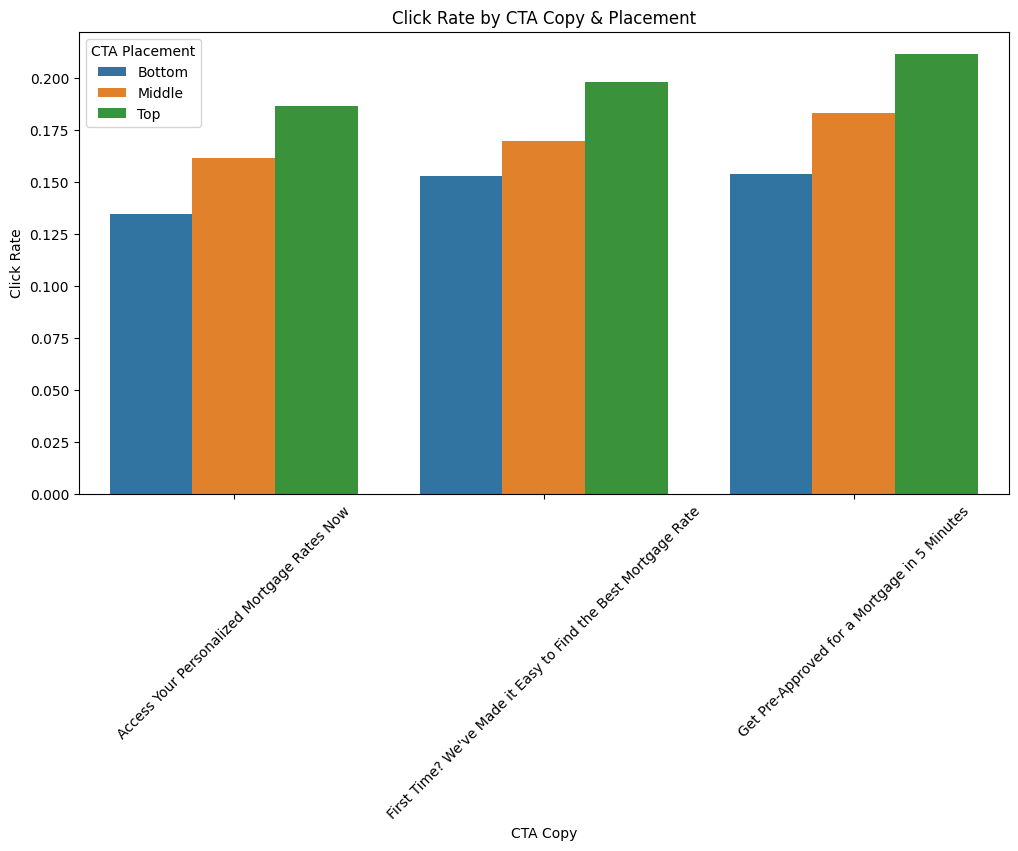

In [11]:
import seaborn as sns

# user is clicking on the call-to-action (yes/no) more when the CTA placement is at the top
# the get pre-approved for a mortgage in 5 minutes also overall performed better in regards to click rate
# access personalized mortgage rates now and bottom performed the worst
# if i had to choose an overall placement to always use it would be Get Pre-approved for a Mortgsge in 5 minutes

cta_click_rates = df.groupby(["ctaCopy", "ctaPlacement"])["clickedCTA"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="ctaCopy", y="clickedCTA", hue="ctaPlacement", data=cta_click_rates)
plt.xlabel("CTA Copy")
plt.ylabel("Click Rate")
plt.title("Click Rate by CTA Copy & Placement")
plt.xticks(rotation=45)
plt.legend(title="CTA Placement")
plt.show()


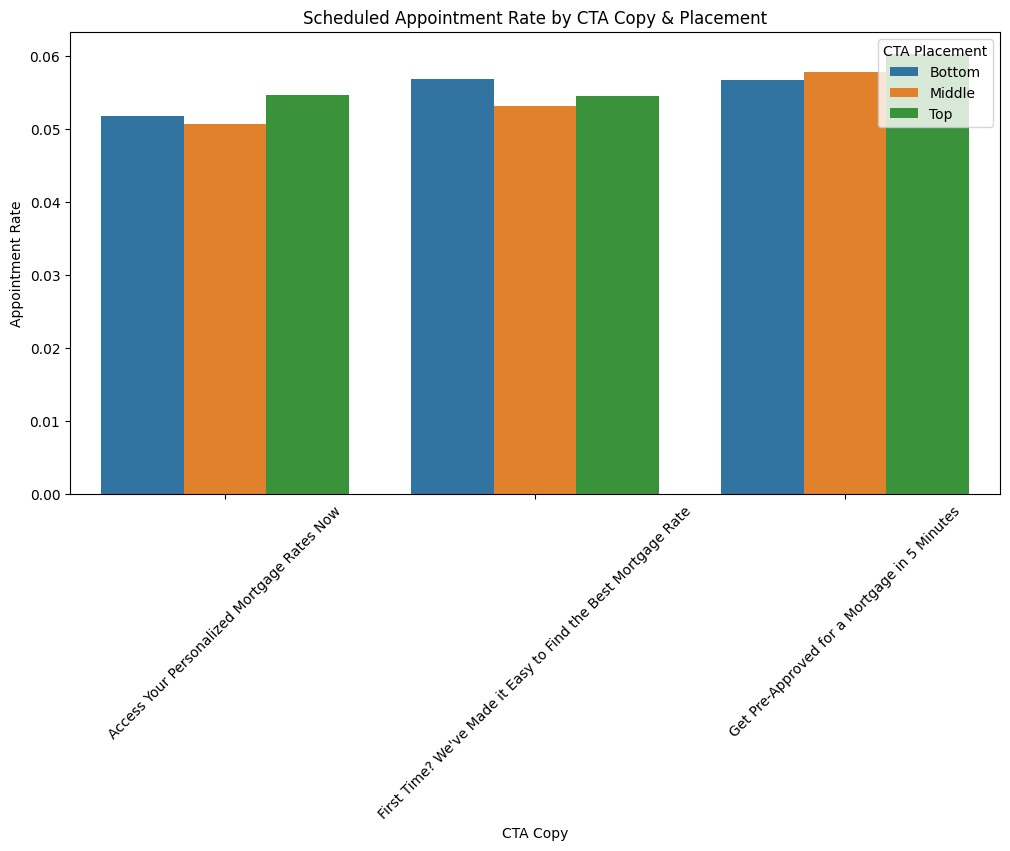

In [12]:
# If the user scheduled an appointment regarding the mortgage application (yes/no) does not seen to be dependent on placement

appt_rates = df.groupby(["ctaCopy", "ctaPlacement"])["scheduledAppointment"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="ctaCopy", y="scheduledAppointment", hue="ctaPlacement", data=appt_rates)
plt.xlabel("CTA Copy")
plt.ylabel("Appointment Rate")
plt.title("Scheduled Appointment Rate by CTA Copy & Placement")
plt.xticks(rotation=45)
plt.legend(title="CTA Placement")
plt.show()

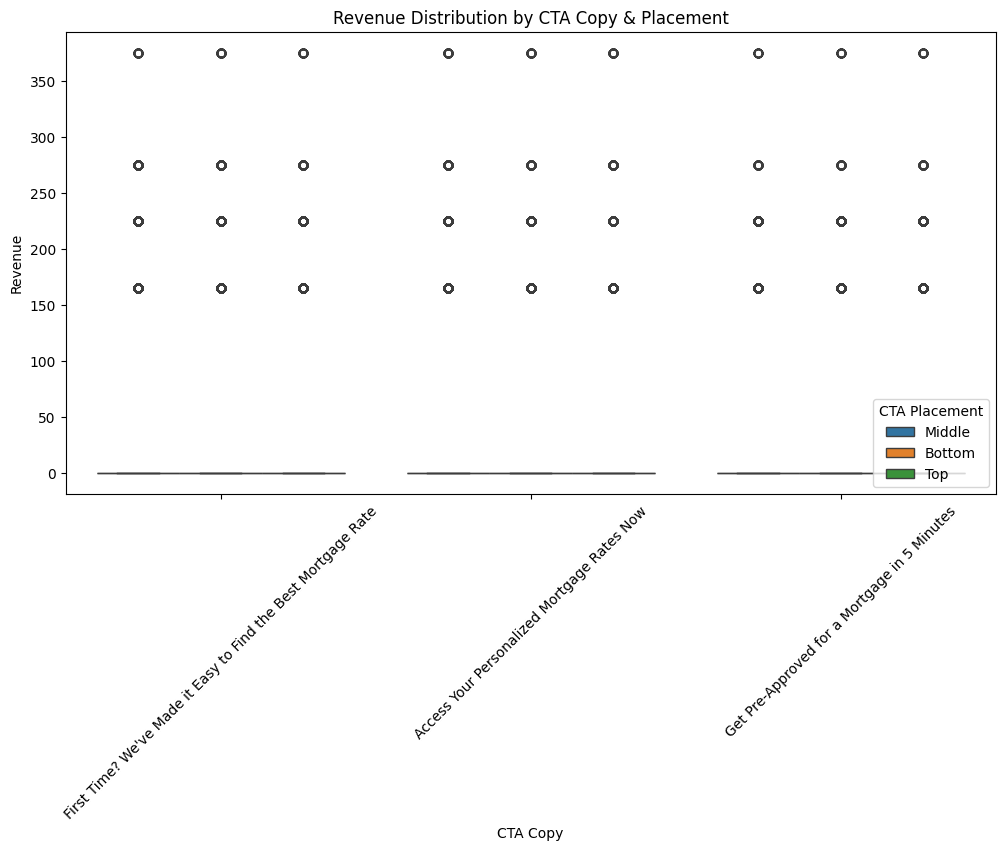

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="ctaCopy", y="revenue", hue="ctaPlacement", data=df)
plt.xlabel("CTA Copy")
plt.ylabel("Revenue")
plt.title("Revenue Distribution by CTA Copy & Placement")
plt.xticks(rotation=45)
plt.legend(title="CTA Placement")
plt.show()

# revenue is mostly 0 for most cases
# CTA copy and placement may not be strongest predictor of revenue
# user behavior may be more promising to look at

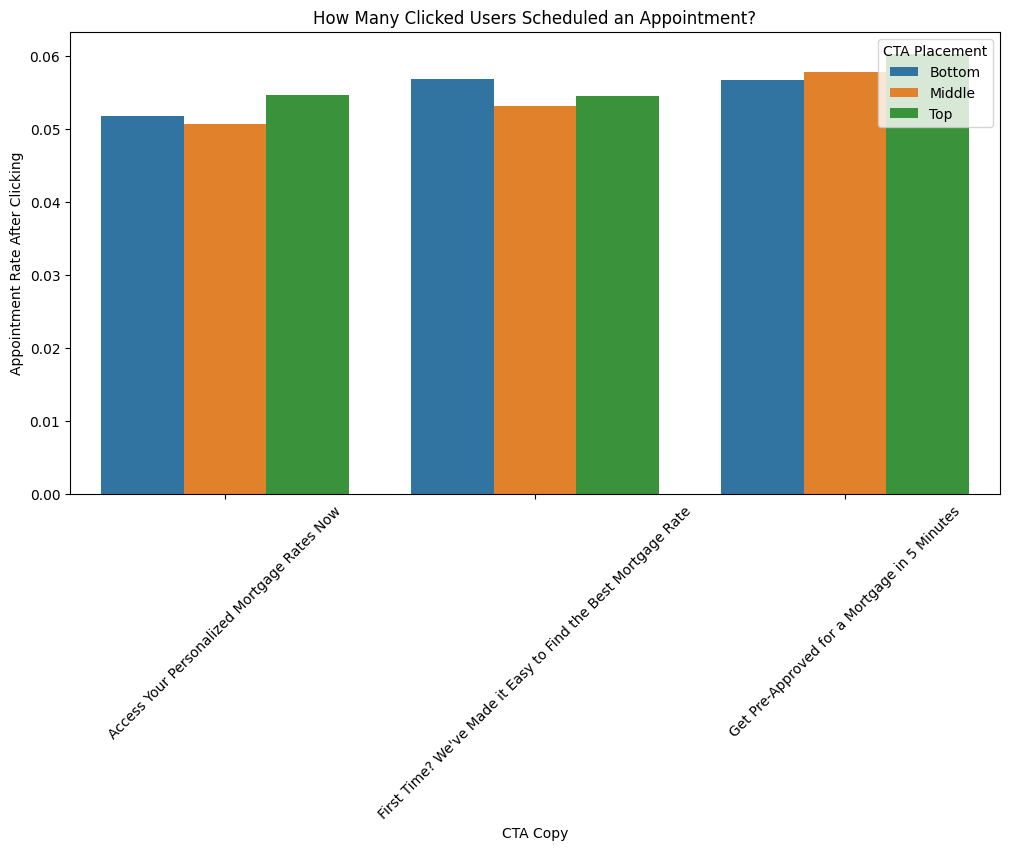

In [15]:
# appointments after clicking on page was again Get Pre-approved for a Mrtgage in 5 minutes placed at the top
# again, its not much of a difference and user-behaviour might be the better path to explore

cta_appointments = df.groupby(["ctaCopy", "ctaPlacement"])[["clickedCTA", "scheduledAppointment"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="ctaCopy", y="scheduledAppointment", hue="ctaPlacement", data=cta_appointments)
plt.xlabel("CTA Copy")
plt.ylabel("Appointment Rate After Clicking")
plt.title("How Many Clicked Users Scheduled an Appointment?")
plt.xticks(rotation=45)
plt.legend(title="CTA Placement")
plt.show()

Incremental revenue (value) means the increase in revenue when switching from one strategy (e.g., average of all CTA placements) to a better-performing one (your selected CTA placement)

In [17]:
chosen_CTA = df[(df["ctaCopy"] == "Get Pre-Approved for a Mortgage in 5 Minutes") &
                (df["ctaPlacement"] == "Top") &
                (df["clickedCTA"] == 1)]

chosen_CTA_revenue = chosen_CTA["revenue"].mean()
chosen_CTA_revenue


59.885252868678286

In [19]:
other_CTAs = df[(df["ctaCopy"] != "Get Pre-Approved for a Mortgage in 5 Minutes") |
                (df["ctaPlacement"] != "Top") &
                (df["clickedCTA"] == 1)]
other_CTAs_revenue = other_CTAs["revenue"].mean()
other_CTAs_revenue

15.083574755737333

In [21]:
# how much incrementally is that worth to us vs. the average of the rest of the split test?
chosen_CTA_revenue - other_CTAs_revenue

44.801678112940955

Part 2:

<ipython-input-24-05360d664174>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deviceType", y="clickedCTA", data=device_engagement, palette="viridis")


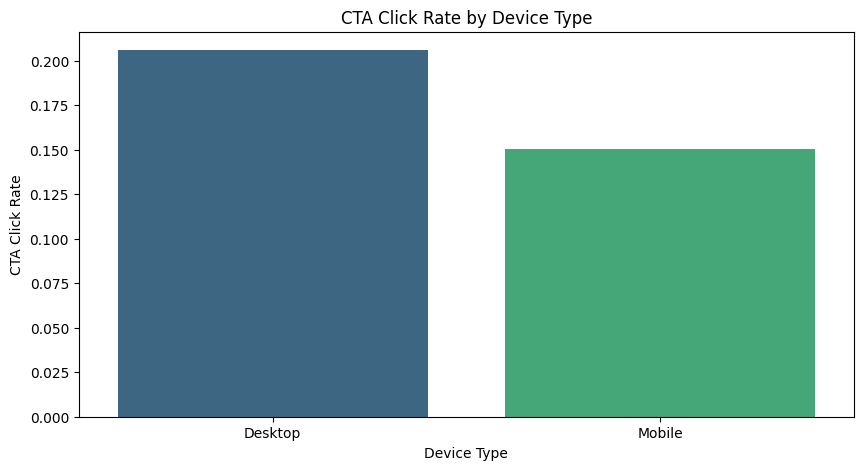

In [24]:
# users on desktop have a higher CTA click rate
device_engagement = df.groupby("deviceType")[["clickedCTA", "scheduledAppointment", "revenue"]].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="deviceType", y="clickedCTA", data=device_engagement, palette="viridis")
plt.xlabel("Device Type")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by Device Type")
plt.show()

<ipython-input-34-bdac918f381e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="browser", y="clickedCTA", data=df, palette="Set2")


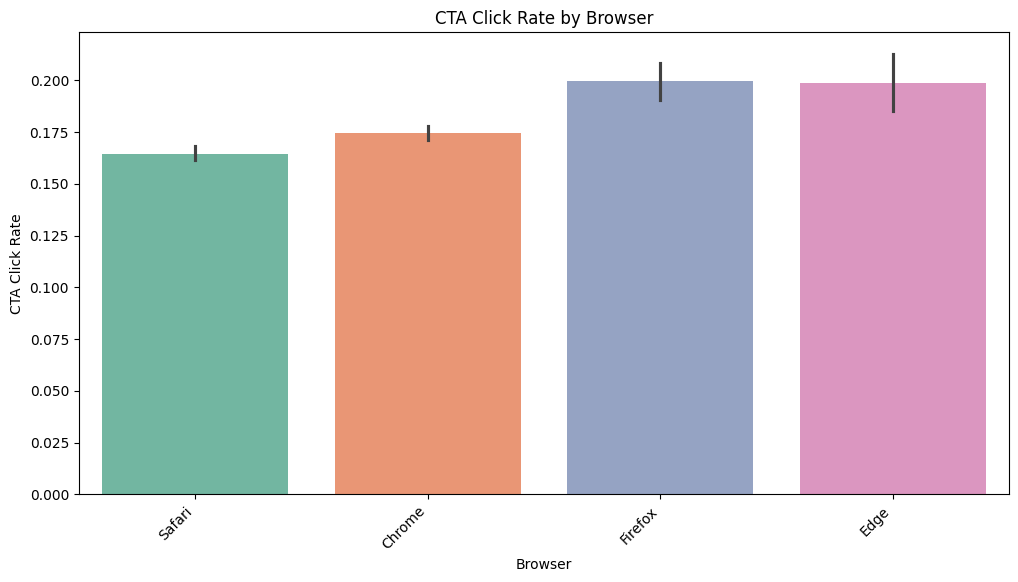

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x="browser", y="clickedCTA", data=df, palette="Set2")
plt.xlabel("Browser")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by Browser")
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-35-daebee8bdc22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deviceType", y="scheduledAppointment", data=df, palette="coolwarm")


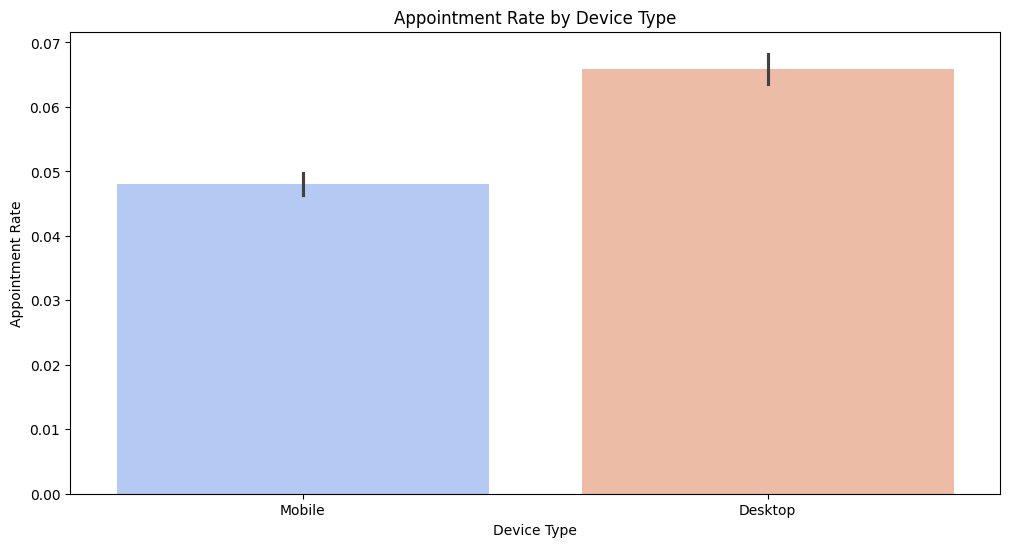

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x="deviceType", y="scheduledAppointment", data=df, palette="coolwarm")
plt.xlabel("Device Type")
plt.ylabel("Appointment Rate")
plt.title("Appointment Rate by Device Type")
plt.show()


<ipython-input-36-a29a88c334c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="browser", y="scheduledAppointment", data=df, palette="coolwarm")


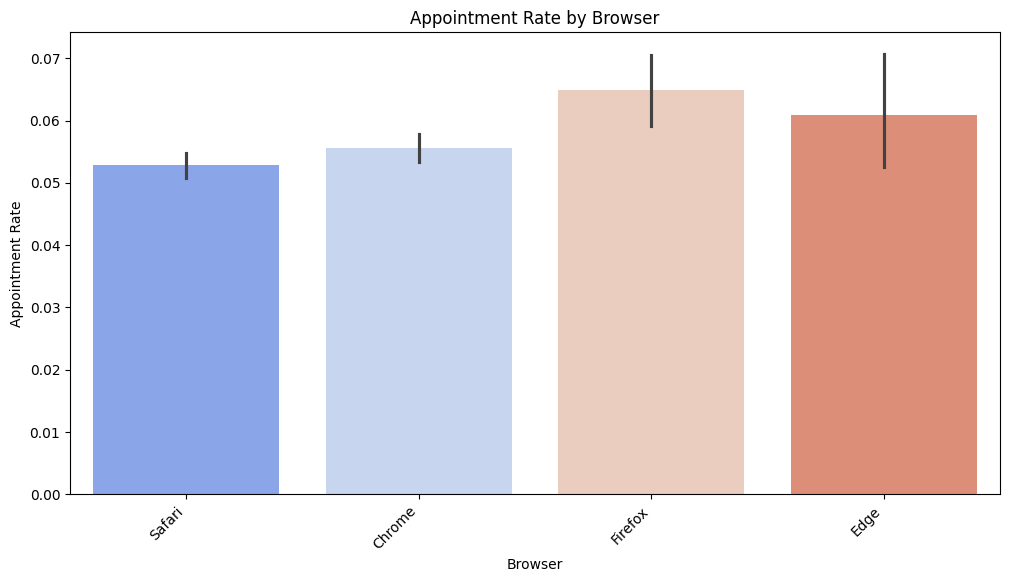

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x="browser", y="scheduledAppointment", data=df, palette="coolwarm")
plt.xlabel("Browser")
plt.ylabel("Appointment Rate")
plt.title("Appointment Rate by Browser")
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-37-13aa333af734>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deviceType", y="revenue", data=df, palette="viridis")


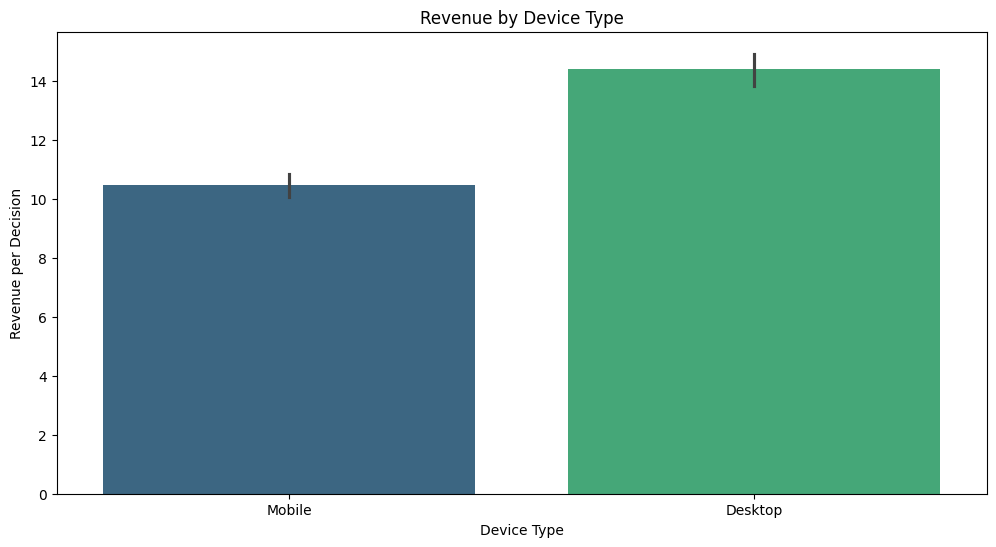

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x="deviceType", y="revenue", data=df, palette="viridis")
plt.xlabel("Device Type")
plt.ylabel("Revenue per Decision")
plt.title("Revenue by Device Type")
plt.show()

<ipython-input-39-f85fb67f4d5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="estimatedPropertyType", y="clickedCTA", data=df, palette="Set3")


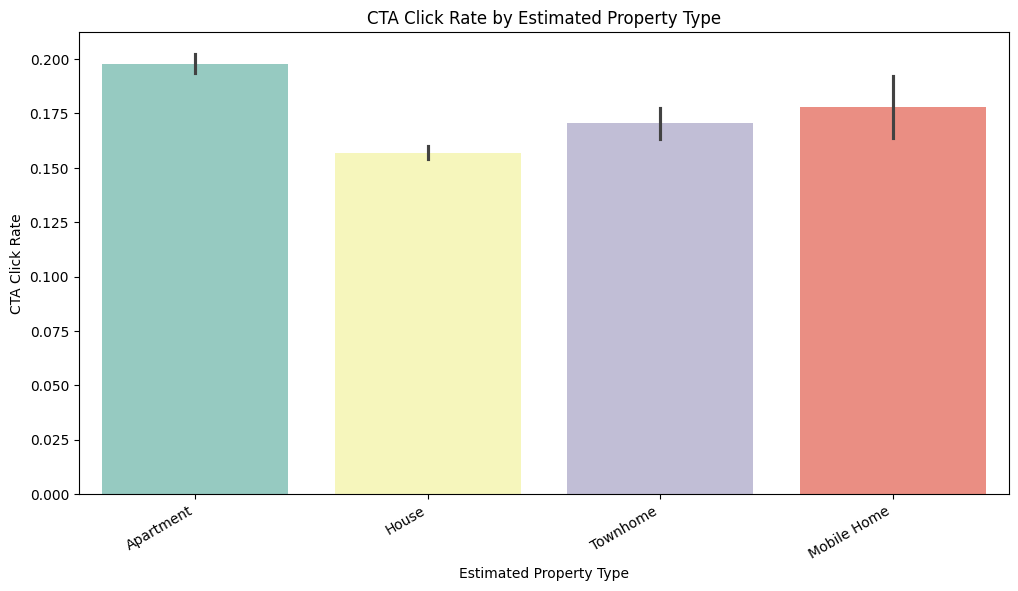

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x="estimatedPropertyType", y="clickedCTA", data=df, palette="Set3")
plt.xlabel("Estimated Property Type")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by Estimated Property Type")
plt.xticks(rotation=30, ha="right")
plt.show()

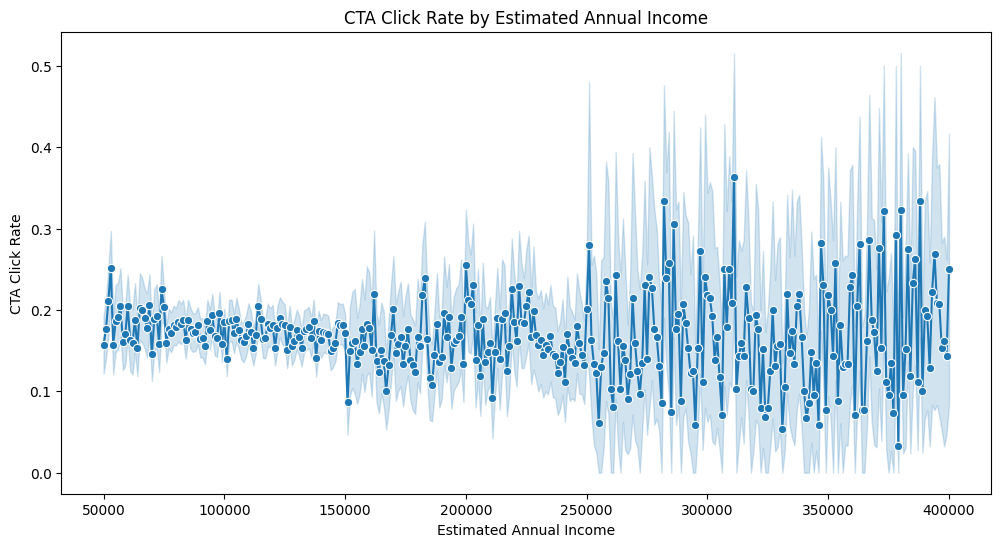

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="estimatedAnnualIncome", y="clickedCTA", data=df, marker="o")
plt.xlabel("Estimated Annual Income")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by Estimated Annual Income")
plt.show()

<ipython-input-41-b09f188d3f88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="estimatedPropertyType", y="scheduledAppointment", data=df, palette="coolwarm")


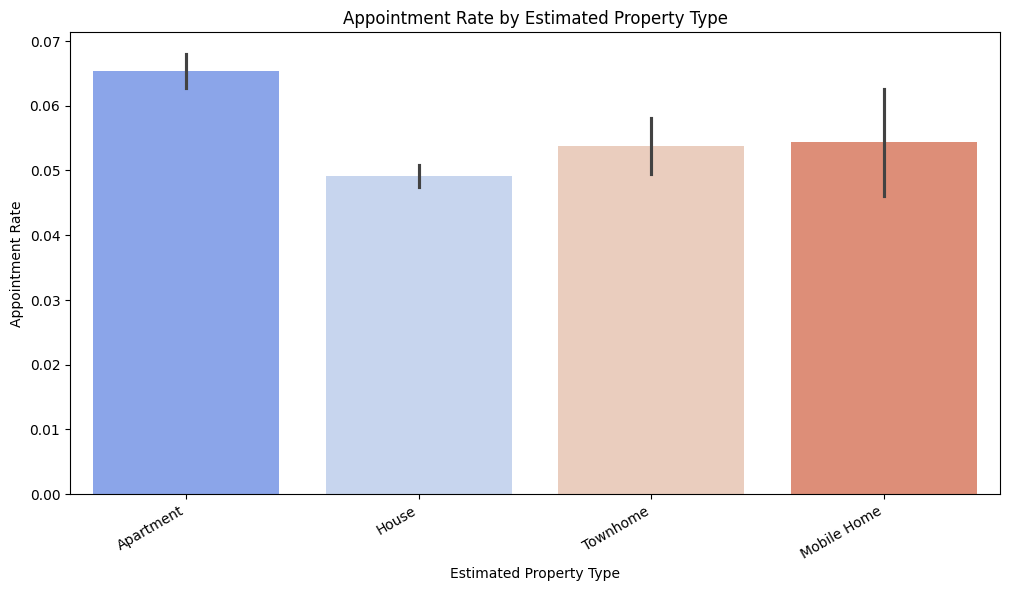

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x="estimatedPropertyType", y="scheduledAppointment", data=df, palette="coolwarm")
plt.xlabel("Estimated Property Type")
plt.ylabel("Appointment Rate")
plt.title("Appointment Rate by Estimated Property Type")
plt.xticks(rotation=30, ha="right")
plt.show()


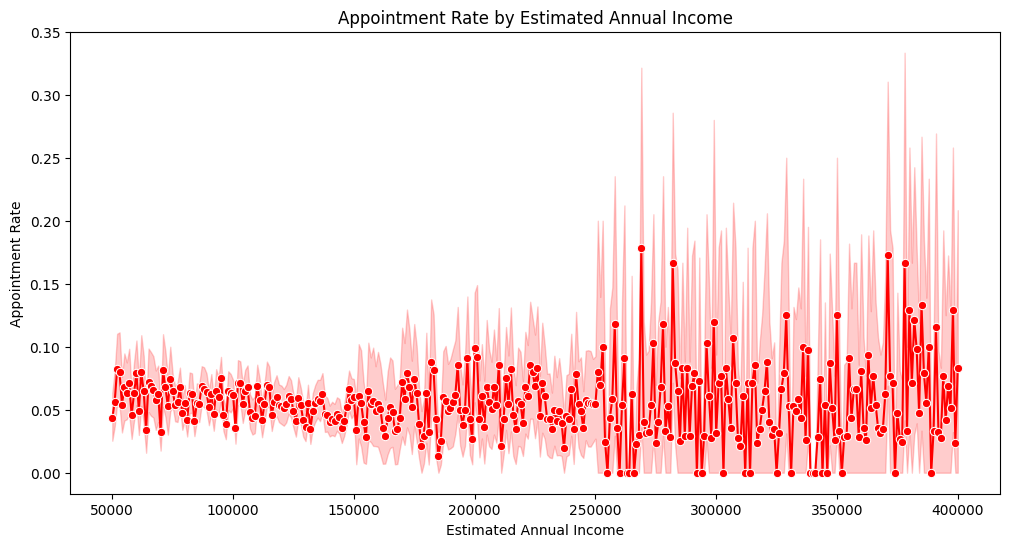

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="estimatedAnnualIncome", y="scheduledAppointment", data=df, marker="o", color="red")
plt.xlabel("Estimated Annual Income")
plt.ylabel("Appointment Rate")
plt.title("Appointment Rate by Estimated Annual Income")
plt.show()

<ipython-input-38-b8d2739f5cf4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="browser", y="revenue", data=df, palette="viridis")


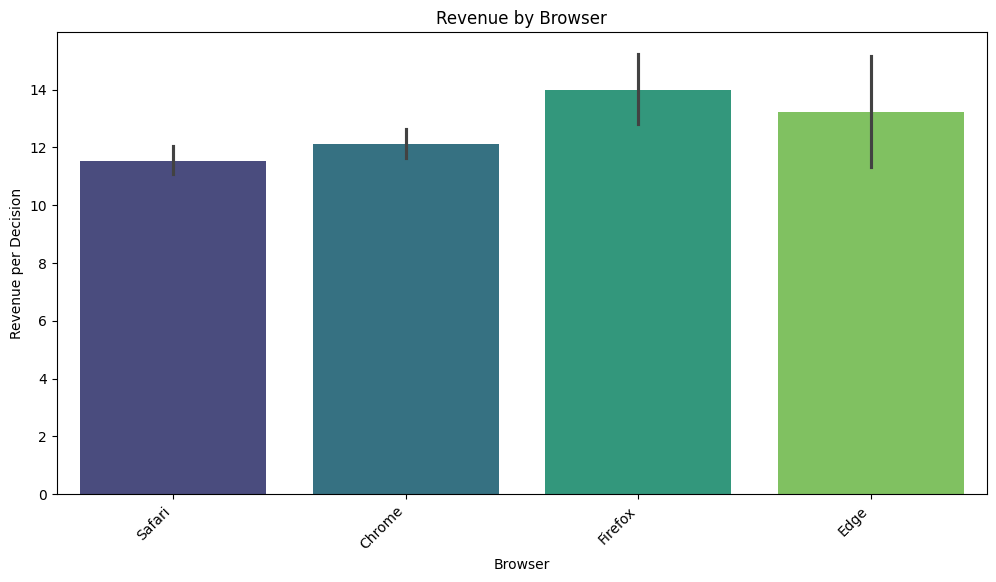

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x="browser", y="revenue", data=df, palette="viridis")
plt.xlabel("Browser")
plt.ylabel("Revenue per Decision")
plt.title("Revenue by Browser")
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-44-ed0d57363604>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="estimatedPropertyType", y="revenue", data=df, palette="viridis")


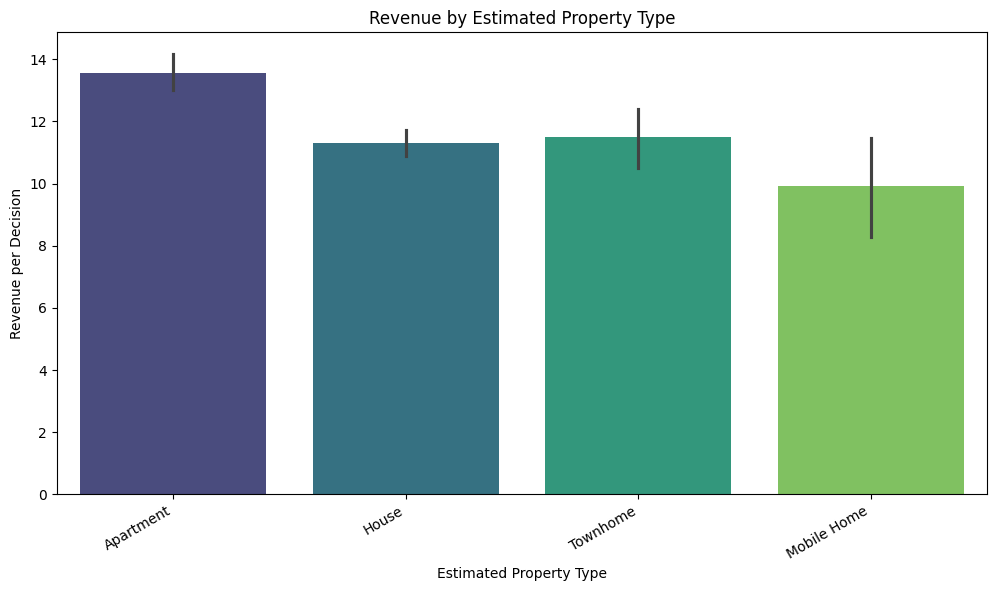

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x="estimatedPropertyType", y="revenue", data=df, palette="viridis")
plt.xlabel("Estimated Property Type")
plt.ylabel("Revenue per Decision")
plt.title("Revenue by Estimated Property Type")
plt.xticks(rotation=30, ha="right")
plt.show()

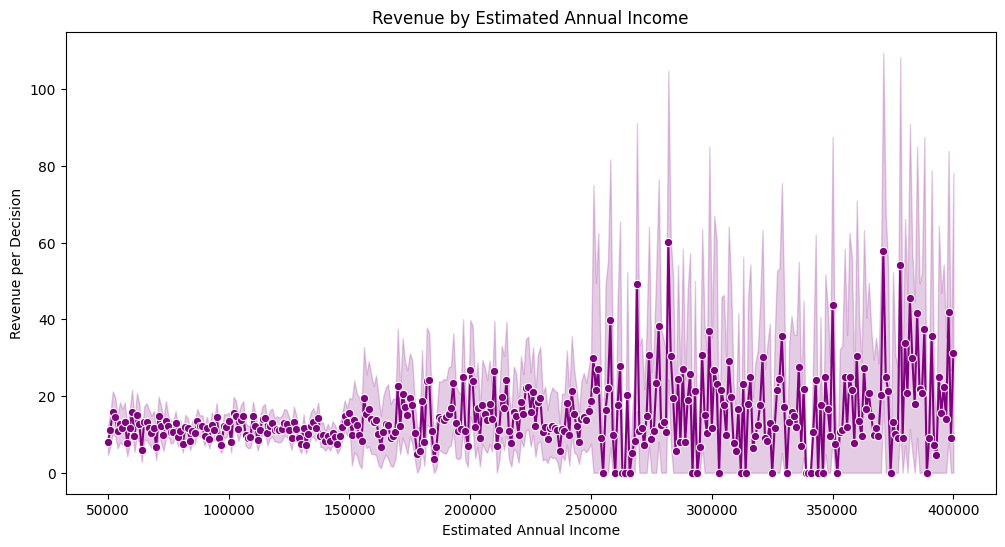

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="estimatedAnnualIncome", y="revenue", data=df, marker="o", color="purple")
plt.xlabel("Estimated Annual Income")
plt.ylabel("Revenue per Decision")
plt.title("Revenue by Estimated Annual Income")
plt.show()

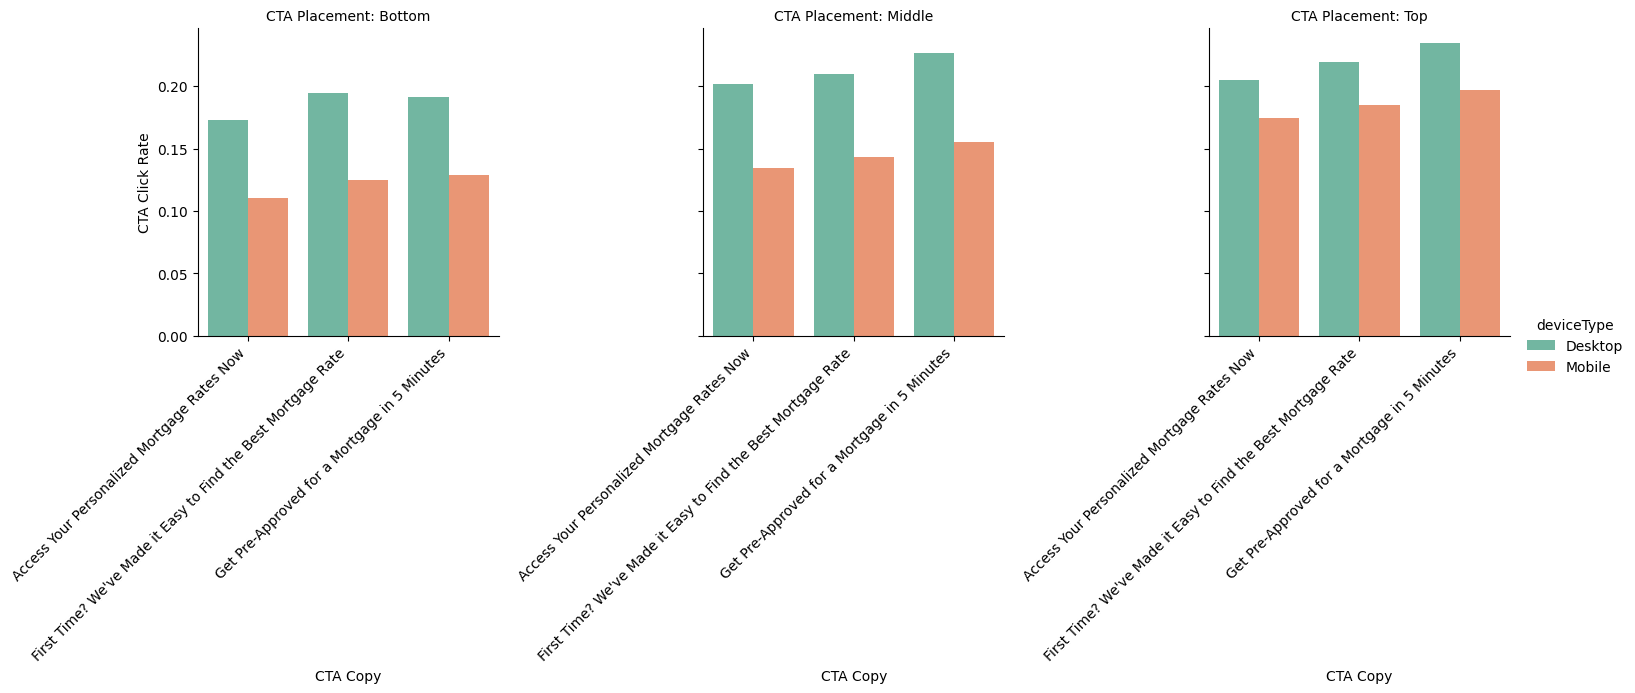

In [25]:
# same placement as overall is still doing best here

cta_device_clicks = df.groupby(["ctaCopy", "ctaPlacement", "deviceType"])["clickedCTA"].mean().reset_index()

g = sns.catplot(
    x="ctaCopy",
    y="clickedCTA",
    hue="deviceType",
    col="ctaPlacement",
    data=cta_device_clicks,
    kind="bar",
    height=4,
    aspect=1.2,
    palette="Set2"
)

g.set_xticklabels(rotation=45, ha="right")
g.set_axis_labels("CTA Copy", "CTA Click Rate")
g.set_titles("CTA Placement: {col_name}")
plt.show()


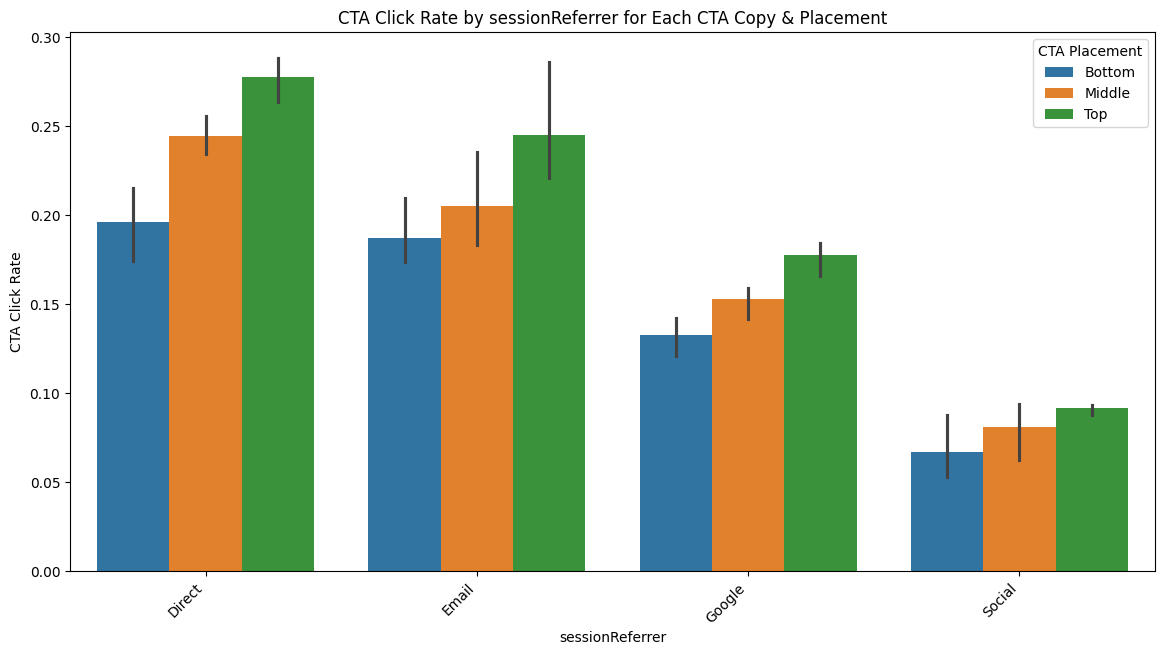

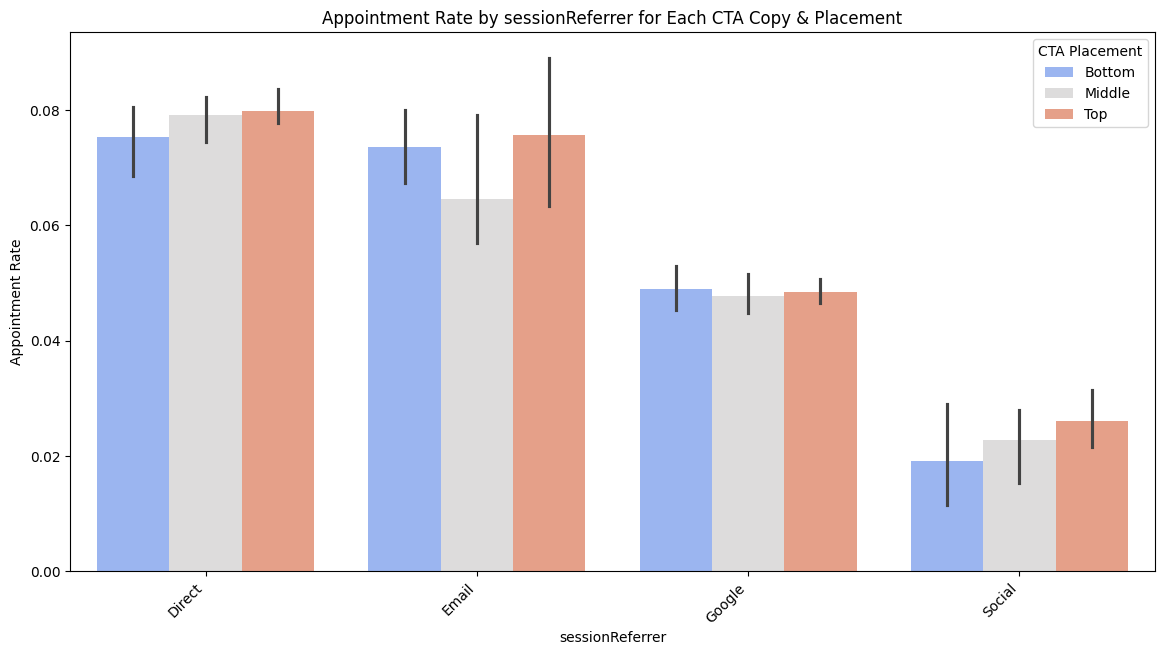

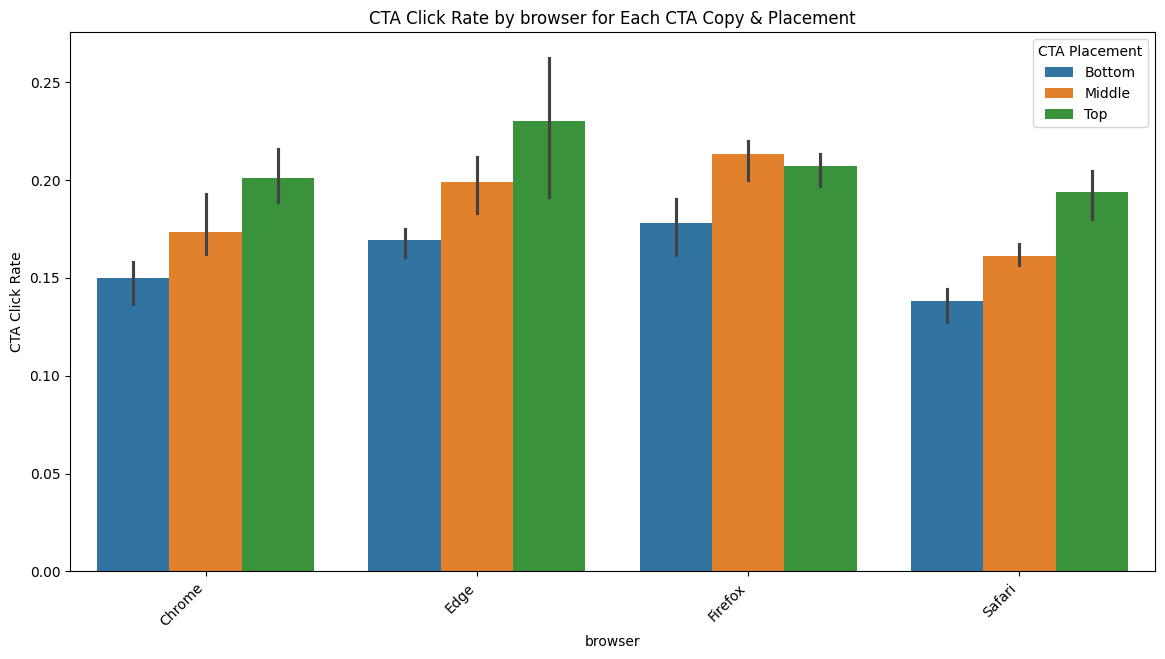

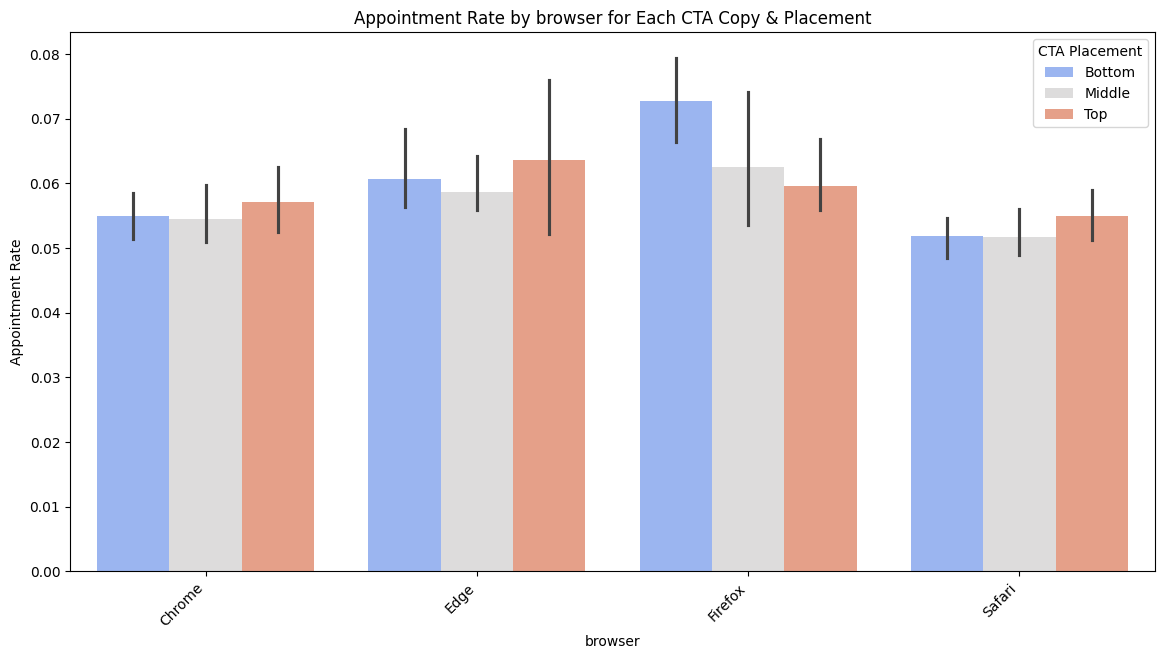

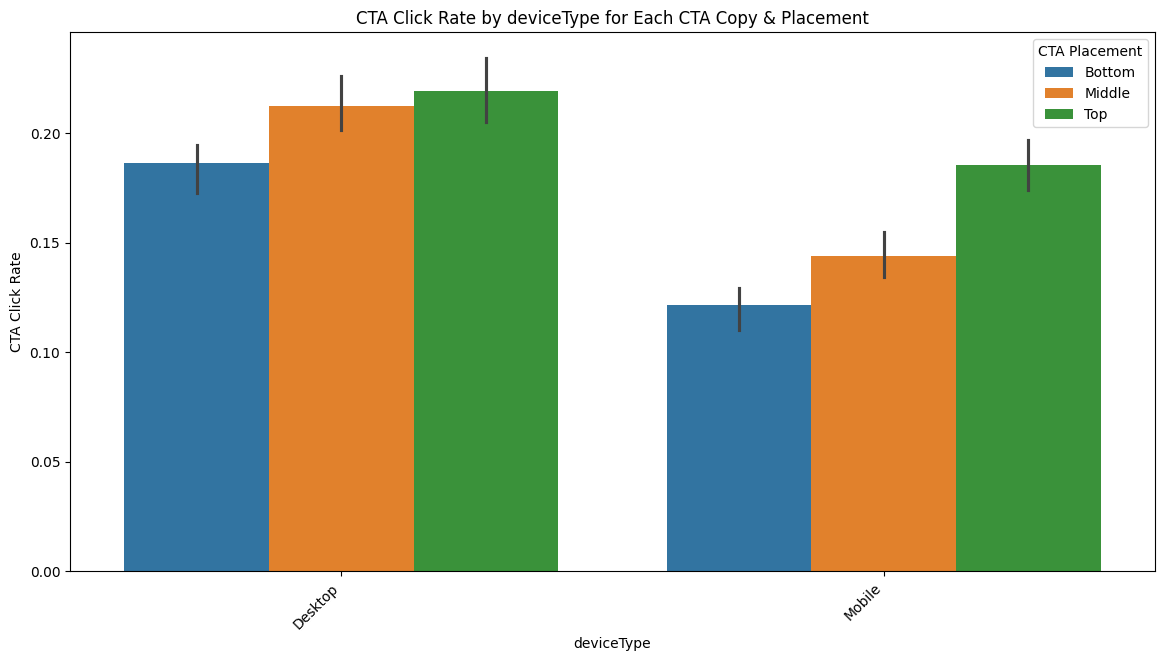

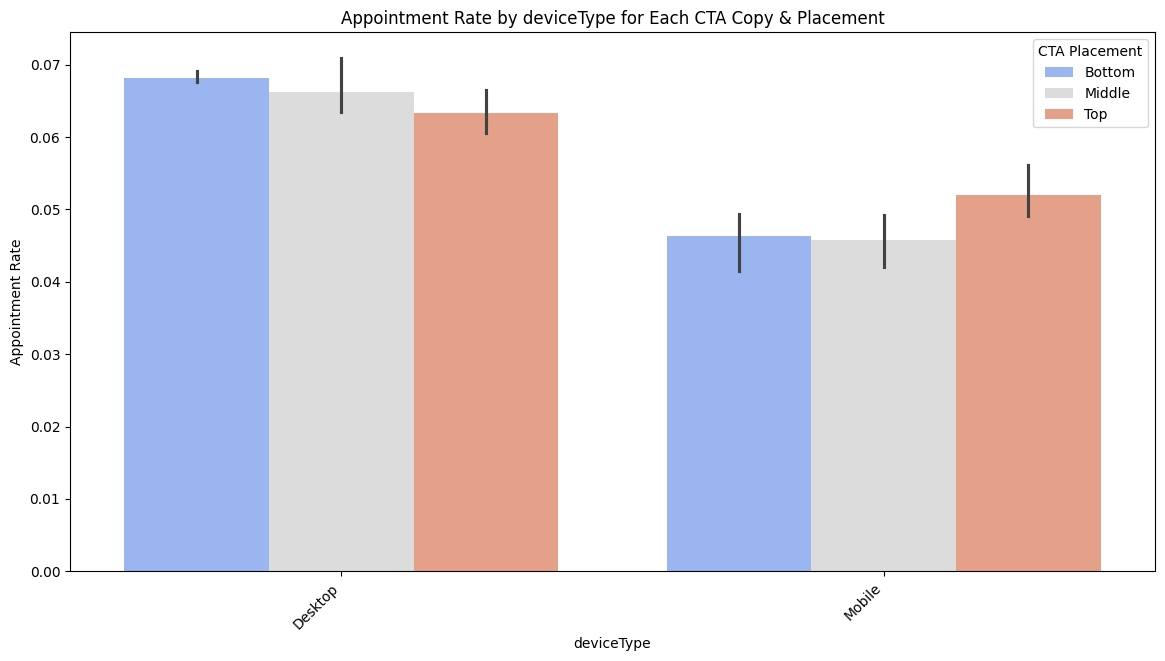

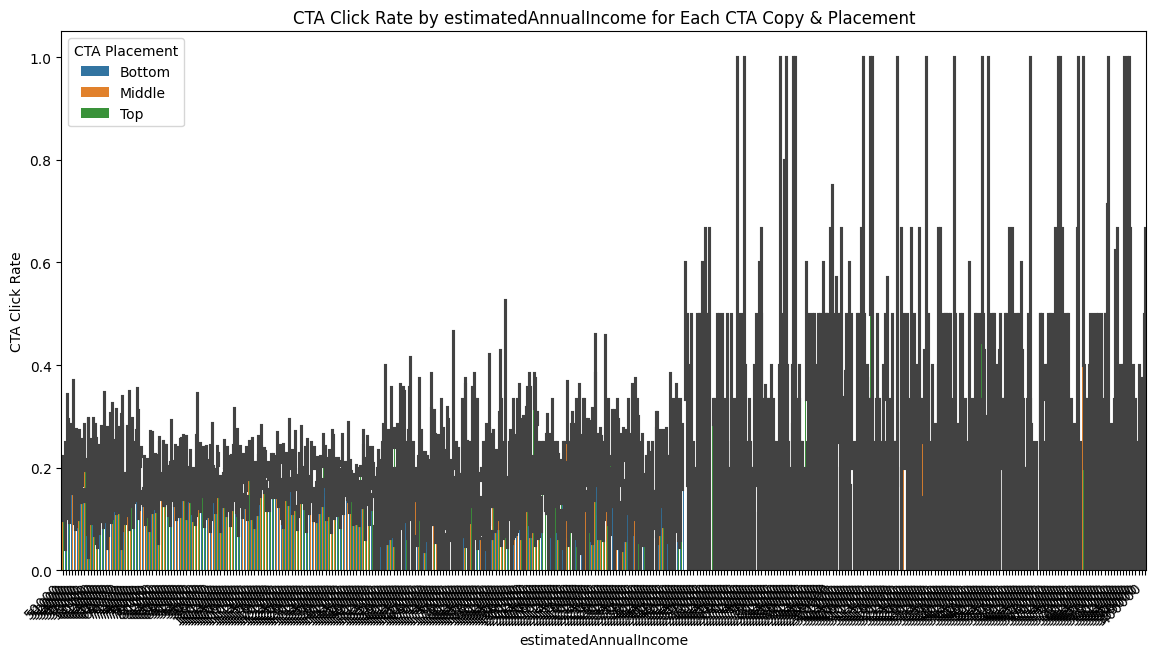

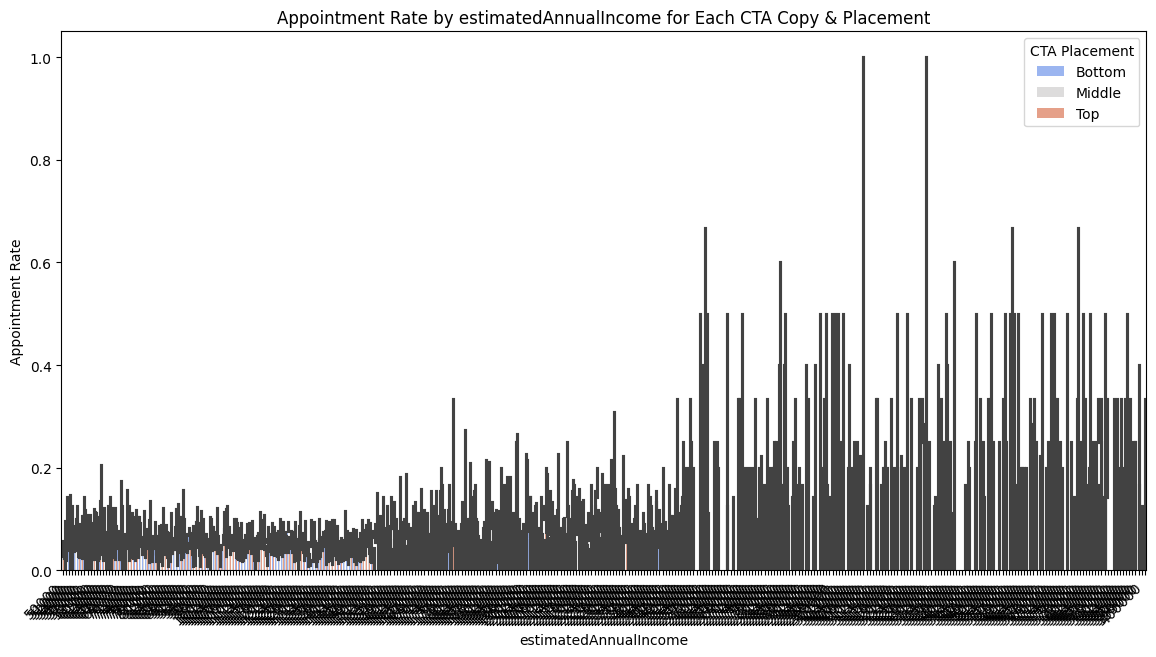

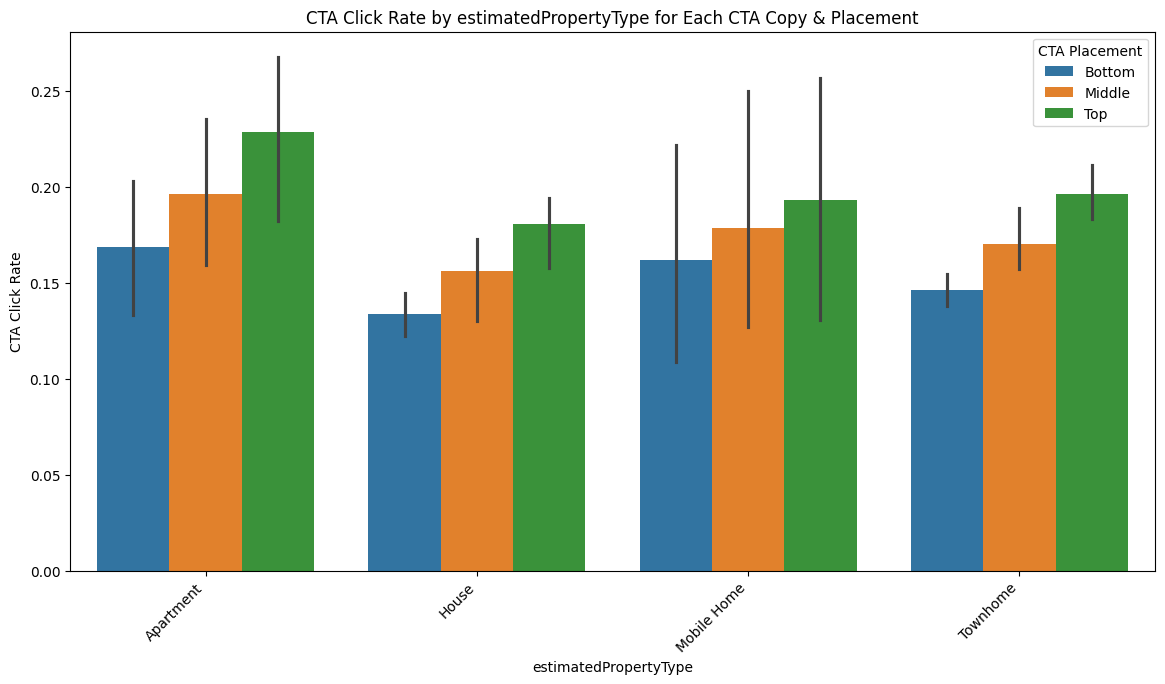

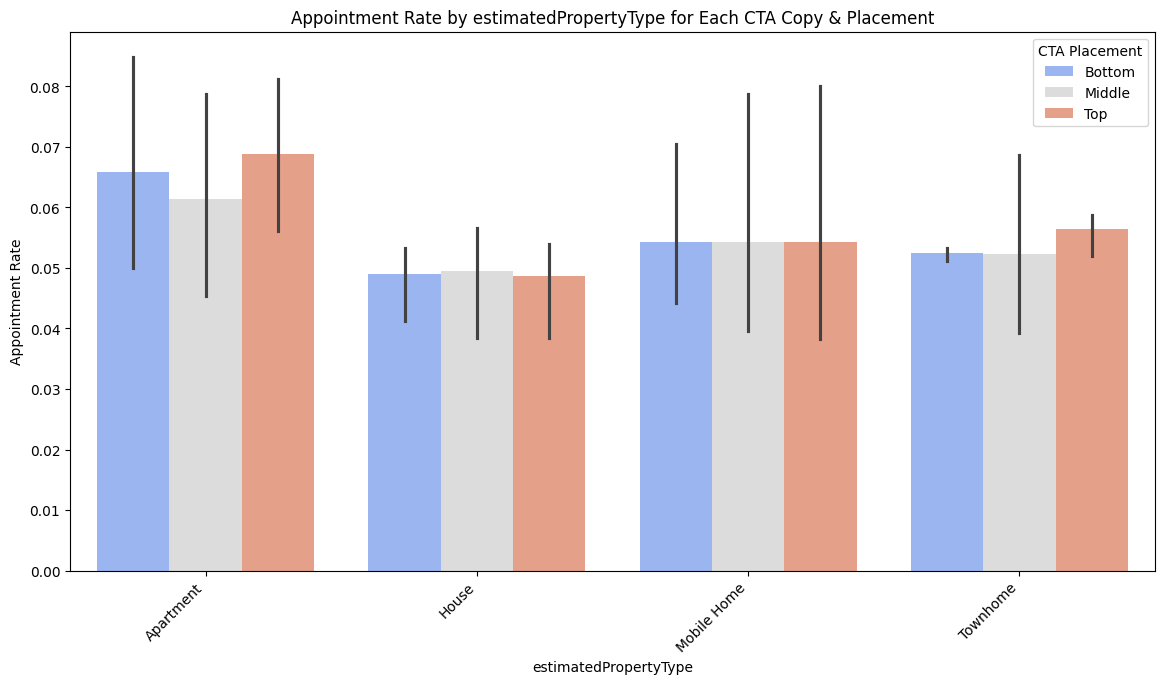

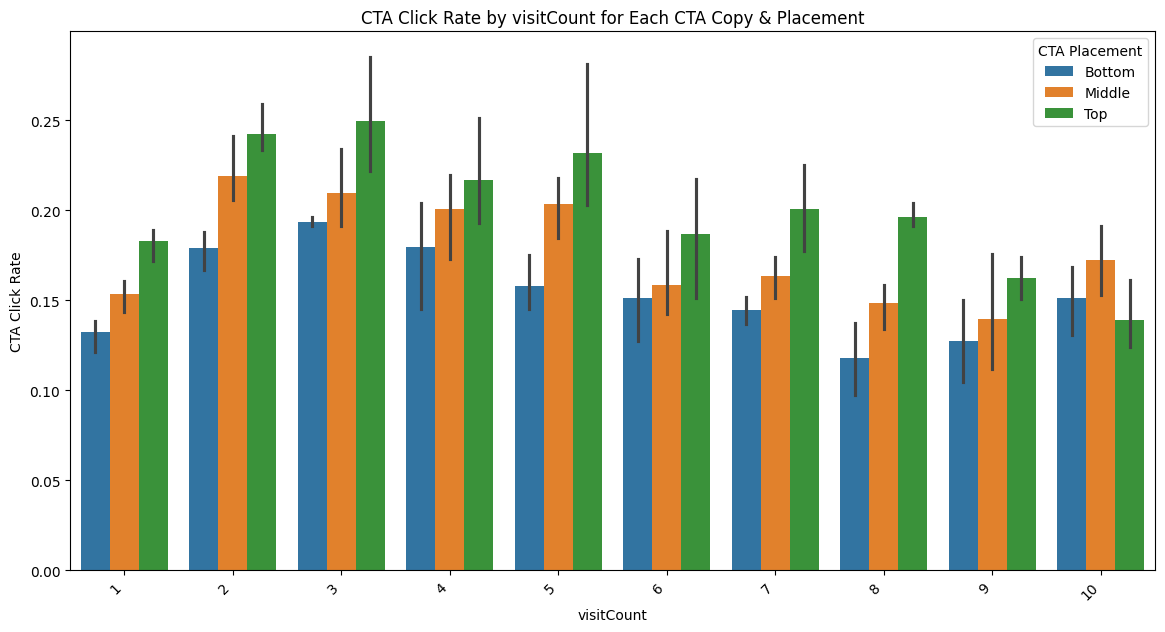

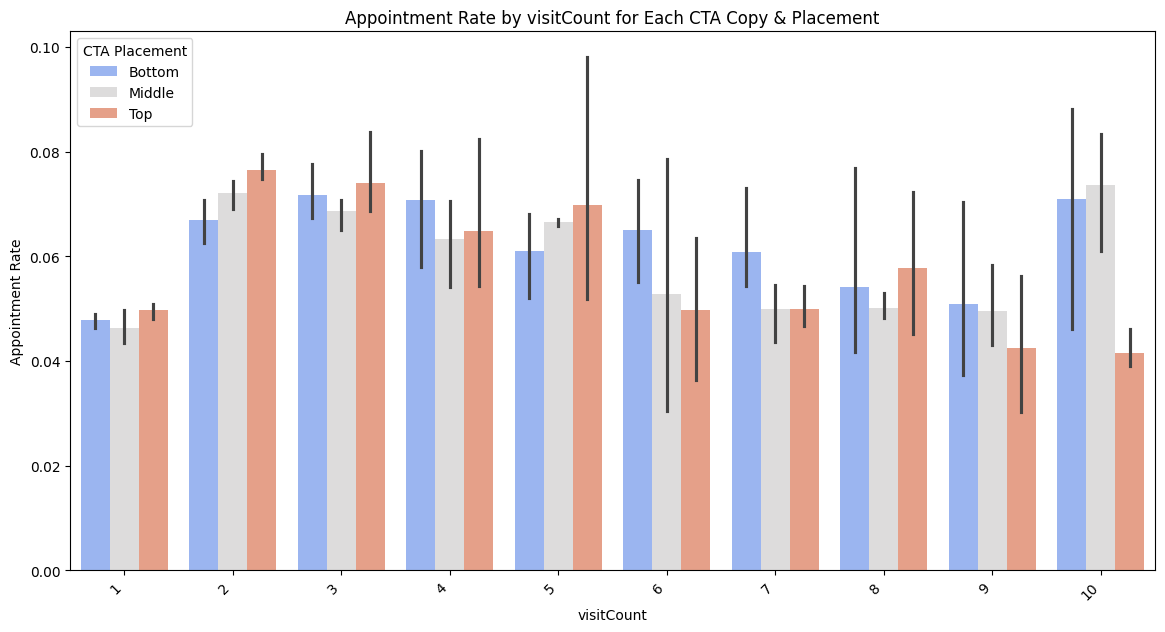

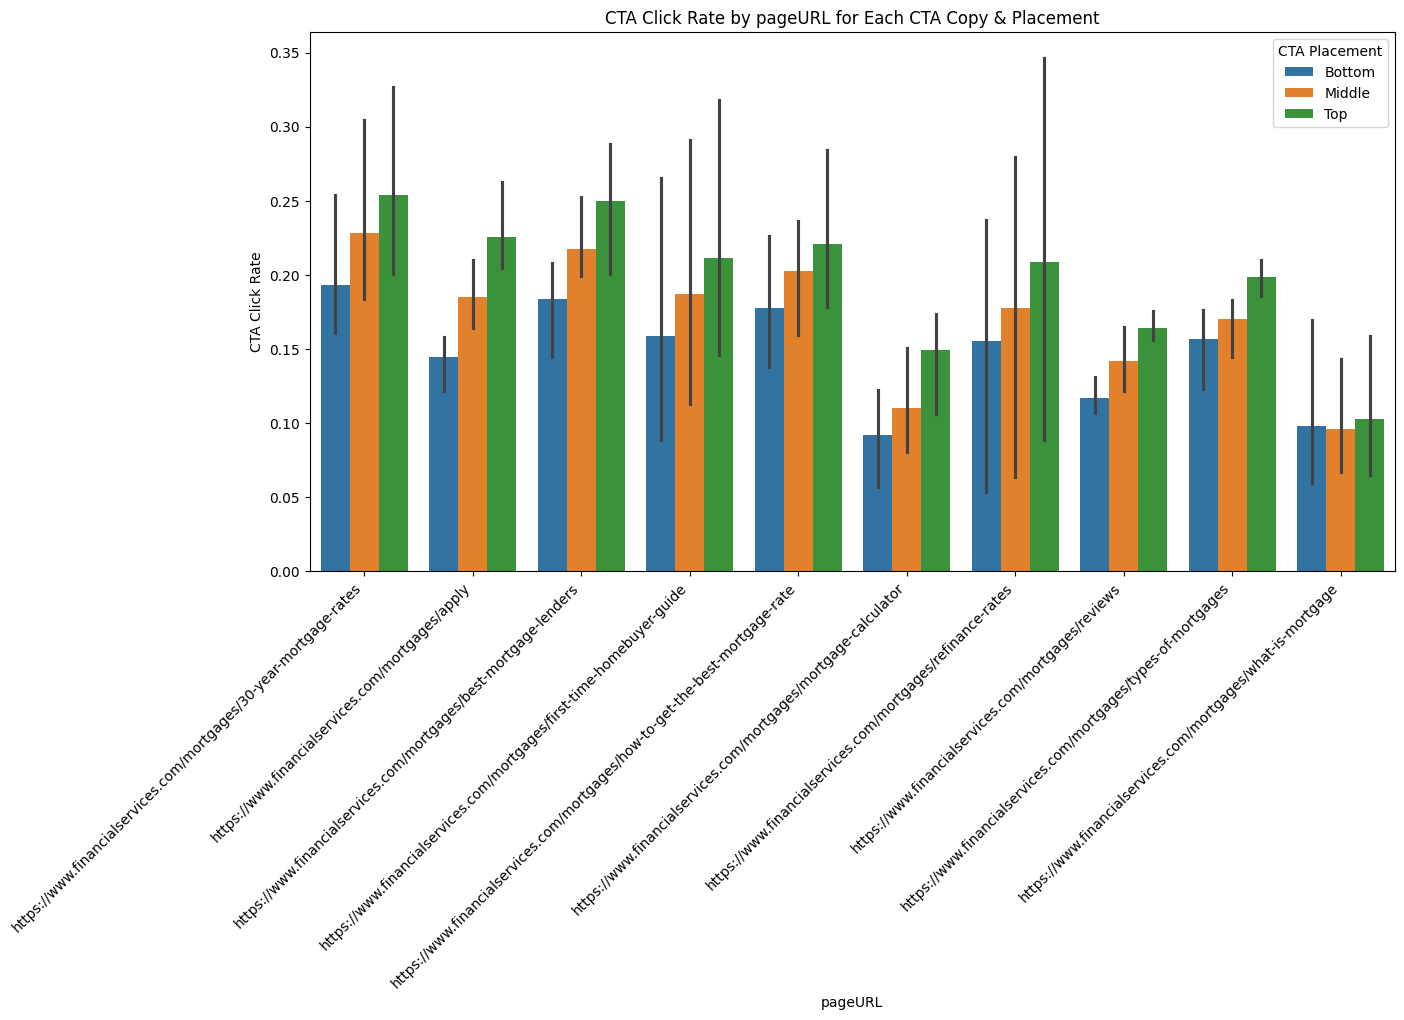

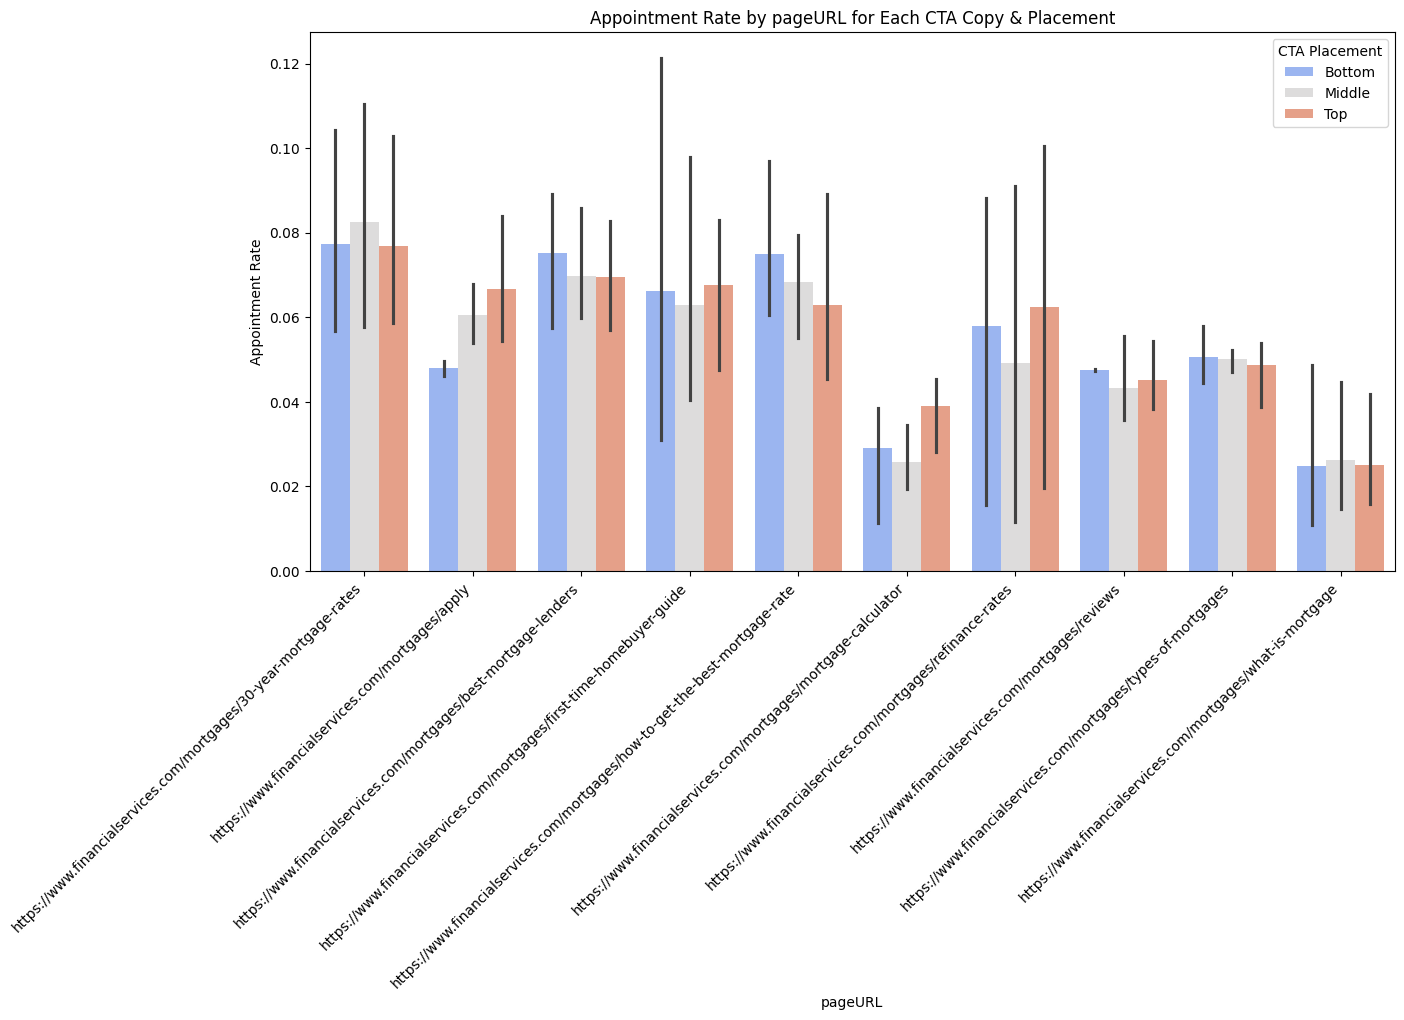

In [27]:
user_attributes = ["sessionReferrer", "browser", "deviceType", "estimatedAnnualIncome", "estimatedPropertyType", "visitCount", "pageURL"]

# grouping by CTA Copy, Placement, and the user attributes
for attr in user_attributes:
    cta_user_engagement = df.groupby(["ctaCopy", "ctaPlacement", attr])[
        ["clickedCTA", "scheduledAppointment"]
    ].mean().reset_index()

    # CTA click rate
    plt.figure(figsize=(14, 7))
    sns.barplot(x=attr, y="clickedCTA", hue="ctaPlacement", data=cta_user_engagement)
    plt.xlabel(attr)
    plt.ylabel("CTA Click Rate")
    plt.title(f"CTA Click Rate by {attr} for Each CTA Copy & Placement")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="CTA Placement")
    plt.show()

    # appointment rate
    plt.figure(figsize=(14, 7))
    sns.barplot(x=attr, y="scheduledAppointment", hue="ctaPlacement", data=cta_user_engagement, palette="coolwarm")
    plt.xlabel(attr)
    plt.ylabel("Appointment Rate")
    plt.title(f"Appointment Rate by {attr} for Each CTA Copy & Placement")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="CTA Placement")
    plt.show()

# top placement is best no matter what session user is on but direct does the best for click rate
# for appointment rate direct is top, email is top, google is bottom, social is top
# for cta clicks top best for chrome, edge and safari, middle best for firefox
# for appointment rate top best for crome, edge, and safari and bottom for firefox
# bottom placement for desktop best for appointment rate and top for mobile but both top for click CTA
# estimated annual income not a good visualization
# top for cta click rate for estimated property types
# appointment rate top for apartment and townhouse, middle for house, any for mobile home
# for visit count always top until 10 then its middle but differs for appointment rate


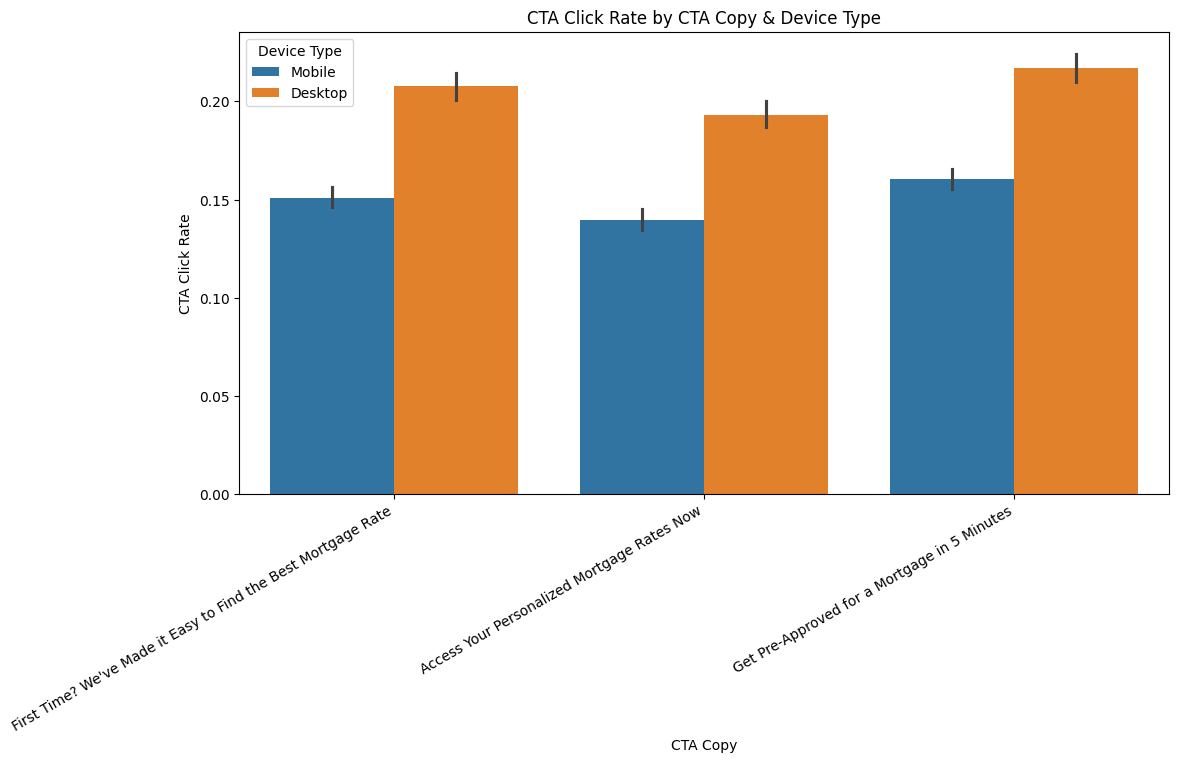

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x="ctaCopy", y="clickedCTA", hue="deviceType", data=df)
plt.xlabel("CTA Copy")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by CTA Copy & Device Type")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Device Type")
plt.show()

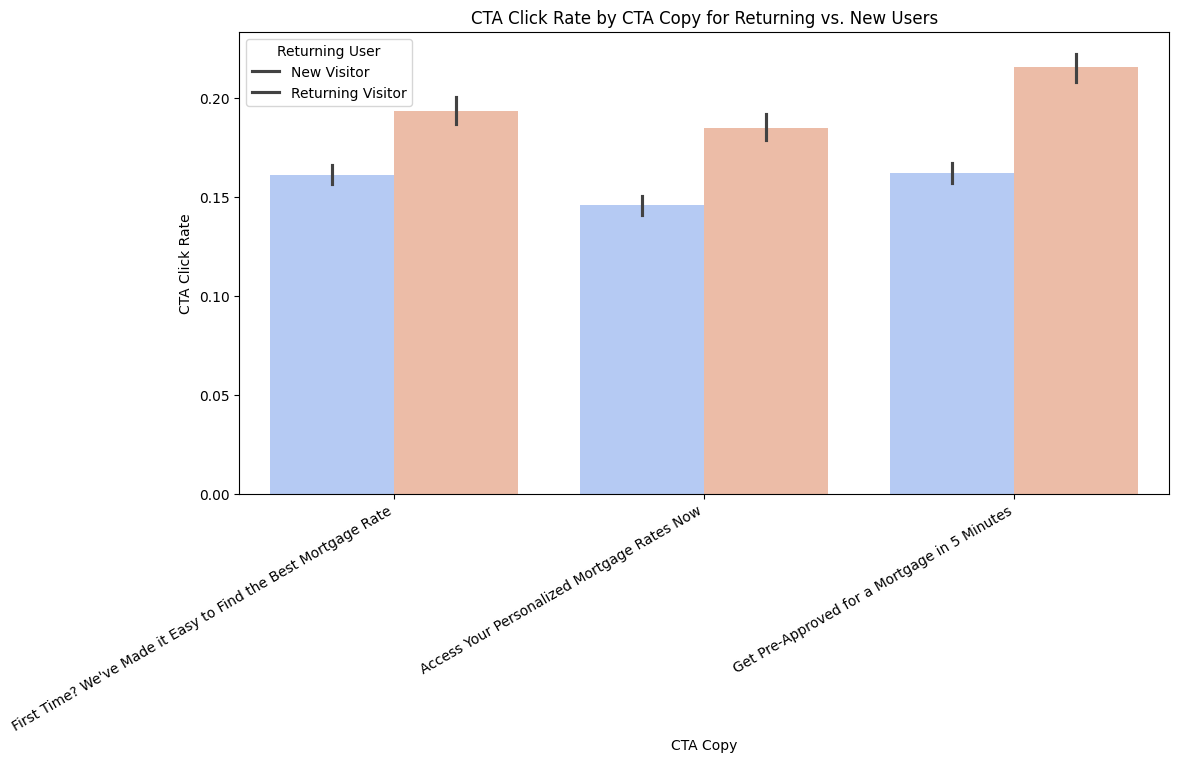

In [30]:
df["returningUser"] = (df["visitCount"] > 1).astype(int)

plt.figure(figsize=(12, 6))
sns.barplot(x="ctaCopy", y="clickedCTA", hue="returningUser", data=df, palette="coolwarm")
plt.xlabel("CTA Copy")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by CTA Copy for Returning vs. New Users")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Returning User", labels=["New Visitor", "Returning Visitor"])
plt.show()

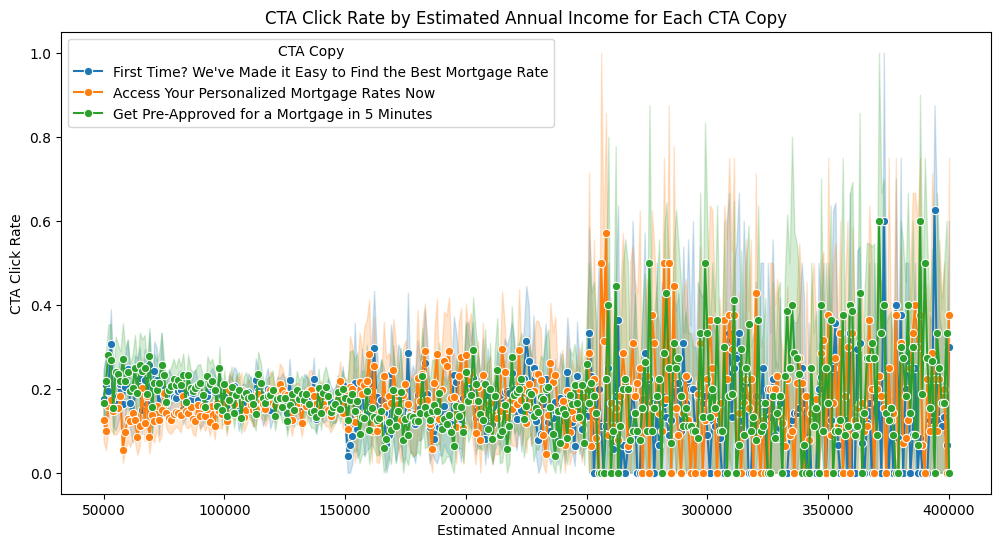

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="estimatedAnnualIncome", y="clickedCTA", hue="ctaCopy", data=df, marker="o")
plt.xlabel("Estimated Annual Income")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by Estimated Annual Income for Each CTA Copy")
plt.legend(title="CTA Copy")
plt.show()


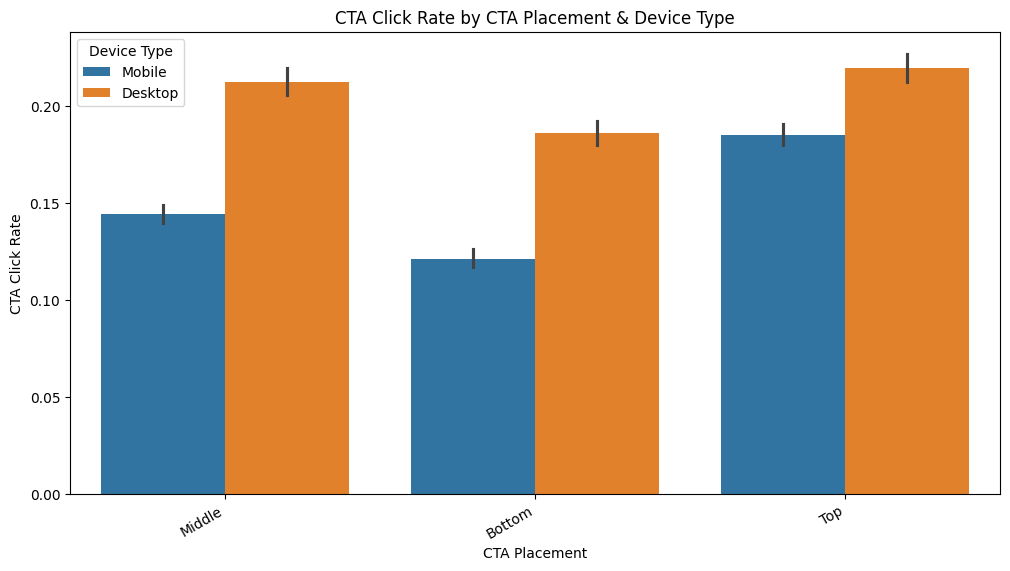

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x="ctaPlacement", y="clickedCTA", hue="deviceType", data=df)
plt.xlabel("CTA Placement")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by CTA Placement & Device Type")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Device Type")
plt.show()

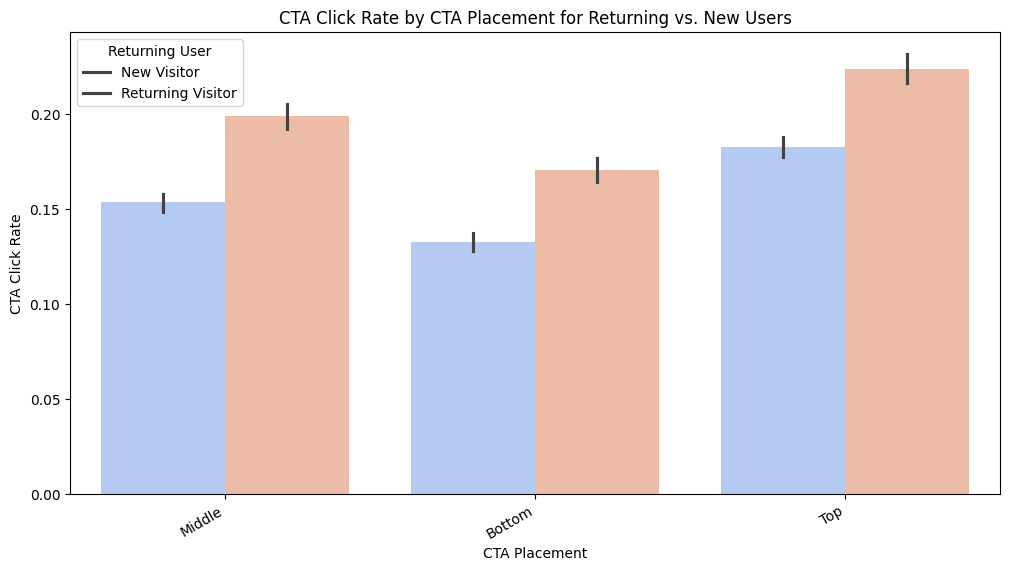

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x="ctaPlacement", y="clickedCTA", hue="returningUser", data=df, palette="coolwarm")
plt.xlabel("CTA Placement")
plt.ylabel("CTA Click Rate")
plt.title("CTA Click Rate by CTA Placement for Returning vs. New Users")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Returning User", labels=["New Visitor", "Returning Visitor"])
plt.show()

Part 3:


want to recommend the best CTA copy & placement for a user based on historical data, using a model that considers similar past users


Random Forest
Features (X):
- visitCount
- deviceType
- browser
- sessionReferrer
- estimatedAnnualIncome
- estimatedPropertyType
- pageURL

Target (y):
- CTA Copy & Placement (ctaCopy + ctaPlacement)


In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# first testing on fewer CTA categories
df["cta_group"] = df["ctaCopy"].apply(lambda x:
    "Pre-Approval" if isinstance(x, str) and "Pre-Approved" in x else
    "Best Rates" if isinstance(x, str) and "Best Mortgage Rates" in x else
    "Personalized Rates" if isinstance(x, str) and "Personalized Mortgage Rates" in x else "Other")

label_encoder = LabelEncoder()
df["cta_group_encoded"] = label_encoder.fit_transform(df["cta_group"])
df["engagement_score"] = df[["scrolledPage", "clickedCTA", "scheduledAppointment"]].sum(axis=1, skipna=True)
df["revenue_bin"] = pd.cut(df["revenue"].fillna(df["revenue"].median()), bins=[0, 50, 150, 300, 1000], labels=["Low", "Medium", "High", "Very High"])
df["income_visit_interaction"] = df["visitCount"].fillna(0) * df["estimatedAnnualIncome"].fillna(df["estimatedAnnualIncome"].median())

df_encoded = pd.get_dummies(df, columns=["deviceType", "browser", "sessionReferrer", "estimatedPropertyType", "pageURL", "revenue_bin"])

features = ["visitCount", "estimatedAnnualIncome", "engagement_score", "income_visit_interaction"] + \
           list(df_encoded.columns[df_encoded.columns.str.startswith(("deviceType_", "browser_", "sessionReferrer_", "estimatedPropertyType_", "pageURL_", "revenue_bin_"))])

X = df_encoded[features].fillna(0)
y = df["cta_group_encoded"]

# train-test-val split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rf_model = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Validation Accuracy: 0.35
Test Accuracy: 0.36
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.35      0.36      4963
           1       0.36      0.36      0.36      5045
           2       0.36      0.36      0.36      4992

    accuracy                           0.36     15000
   macro avg       0.36      0.36      0.36     15000
weighted avg       0.36      0.36      0.36     15000



In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# all CTA combination (CTA Copy + Placement)
df["cta_combination"] = df["ctaCopy"] + " - " + df["ctaPlacement"]

label_encoder = LabelEncoder()
df["cta_combination_encoded"] = label_encoder.fit_transform(df["cta_combination"])
df["engagement_score"] = df[["scrolledPage", "clickedCTA", "scheduledAppointment"]].sum(axis=1, skipna=True)
df["income_visit_interaction"] = df["visitCount"].fillna(0) * df["estimatedAnnualIncome"].fillna(df["estimatedAnnualIncome"].median())
df_encoded = pd.get_dummies(df, columns=["deviceType", "browser", "sessionReferrer", "estimatedPropertyType", "pageURL"])

features = ["visitCount", "estimatedAnnualIncome", "engagement_score", "income_visit_interaction", "cta_combination_encoded"] + \
           list(df_encoded.columns[df_encoded.columns.str.startswith(("deviceType_", "browser_", "sessionReferrer_", "estimatedPropertyType_", "pageURL_"))])

X = df_encoded[features].fillna(0)
y = df["revenue"].fillna(df["revenue"].median())

# train-test-val split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rf_revenue = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf_revenue.fit(X_train, y_train)

y_val_pred = rf_revenue.predict(X_val)
y_test_pred = rf_revenue.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 2.51
Root Mean Squared Error (RMSE): 13.29


In [14]:
# best cta combination for user recommender
def recommend_cta(user_data):
    user_encoded = pd.get_dummies(pd.DataFrame([user_data]), columns=["deviceType", "browser", "sessionReferrer", "estimatedPropertyType", "pageURL"])

    missing_cols = set(X_train.columns) - set(user_encoded.columns)
    for col in missing_cols:
        user_encoded[col] = 0
    user_encoded = user_encoded[X_train.columns]

    best_cta = None
    best_revenue = 0

    for cta in label_encoder.classes_:
        user_encoded["cta_combination_encoded"] = label_encoder.transform([cta])[0]
        predicted_revenue = rf_revenue.predict(user_encoded)[0]

        if predicted_revenue > best_revenue:
            best_revenue = predicted_revenue
            best_cta = cta

    return best_cta, best_revenue

# example user
new_user = {
    "visitCount": 3,
    "estimatedAnnualIncome": 85000,
    "engagement_score": 3,
    "income_visit_interaction": 3 * 85000,
    "deviceType": "Desktop",
    "browser": "Chrome",
    "sessionReferrer": "Organic",
    "estimatedPropertyType": "Residential",
    "pageURL": "Homepage"
}

best_cta, expected_revenue = recommend_cta(new_user)
print(f"\nRecommended CTA: {best_cta}")
print(f"Expected Revenue: ${expected_revenue:.2f}")



Recommended CTA: First Time? We've Made it Easy to Find the Best Mortgage Rate - Top
Expected Revenue: $198.95
